# PROYECTO DE INTELIGENCIA ARTIFICIAL


## Por: Marco Castelo

### CREACIÓN DE UNA RED NEURONAL ARTIFICIAL PARA LA DETECCIÓN DE PACIENTES CON NEUMONIA MEDIANTE LA EVALUACIÓN DE RADIOGRAFÍAS DE TORAX

#### Importamos las librerías necesarias para crear nuestro modelo

In [71]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU  ##Librerías que necesitamos para crear nuestra red neuronal

#### Cargamos las imágenes en la memoria del computador

In [72]:
dirname = os.path.join(os.getcwd(), 'NEUMONIA')## lugar de donde obtenemos las imágenes de las rediografías
imgpath = dirname + os.sep 
#procedemos a la lecura de las radiografías
images = []
directories = []
dircount = []
prevRoot=''
cant=0
print("leyendo imagenes de ",imgpath)
dirname = os.path.join(os.getcwd(), 'NEUMONIA') 
imgpath = dirname + os.sep 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
print("leyendo imagenes de ",imgpath)
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant) 
dircount = dircount[1:]#obtenemos el número de imágenes que tiene cada directorio
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\MARCO\NEUMONIA\
leyendo imagenes de  C:\Users\MARCO\NEUMONIA\
C:\Users\MARCO\NEUMONIA\NORMAL 1
C:\Users\MARCO\NEUMONIA\PNEUMONIA 1575
Directorios leidos: 2
Imagenes en cada directorio [1576, 1730]
suma Total de imagenes en subdirs: 3306


#### Creamos las etiquetas

In [73]:
labels=[] #creamos las etiquetas
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  3306


#### Creamos las clases y las guardamos en una lista

In [74]:
NEUMONIA=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    NEUMONIA.append(name[len(name)-1])
    indice=indice+1#en la lista NEUMONIA guardamos las clases etiquetadas

0 NORMAL
1 PNEUMONIA


In [75]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy


classes = np.unique(y)
nClasses = len(classes)
print('Número total de salidas : ', nClasses)
print('Tipos de salida : ', classes)

Número total de salidas :  2
Tipos de salida :  [0 1]


#### Dividimos los datos en entrenamiento y prueba

In [76]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Datos de Entrenamiento: ', train_X.shape, train_Y.shape)
print('Datos de Prueba : ', test_X.shape, test_Y.shape)

Datos de Entrenamiento:  (2644, 28, 28, 3) (2644,)
Datos de Prueba :  (662, 28, 28, 3) (662,)


#### Mostramos una imagen de entrenamiento y una de prueba

Text(0.5, 1.0, 'Imágenes de prueba : 0')

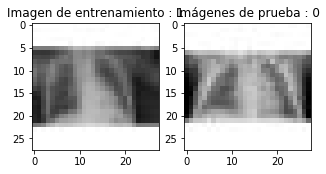

In [77]:
plt.figure(figsize=[5,5])

# Se muestra la primera imagen de los datos de entrenamiemto
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Imagen de entrenamiento : {}".format(train_Y[0]))

# Se muestra la primera imagen de los datos de prueba
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Imágenes de prueba : {}".format(test_Y[0]))

#### Preparamos las variables para la construcción del modelo


In [78]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [79]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original :', train_Y[0])
print('después de la conversion to one-hot:', train_Y_one_hot[0])

Original : 1
después de la conversion to one-hot: [0. 1.]


In [80]:
#Mezclar todo y crear los grupos de entrenamiento y prueba
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [81]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(2115, 28, 28, 3) (529, 28, 28, 3) (2115, 2) (529, 2)


## Creación del modelo 

In [82]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 150 # Cantidad de épocas de la red Neuronal 
batch_size = 64 # Tamaño de lote de imagenes en memoria

In [83]:
neumo_model = Sequential()
neumo_model.add(Conv2D(128, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,3)))
neumo_model.add(LeakyReLU(alpha=0.1))
neumo_model.add(MaxPooling2D((2, 2),padding='same'))
neumo_model.add(Dropout(0.5))
neumo_model.add(Flatten())
neumo_model.add(Dense(32, activation='linear'))
neumo_model.add(LeakyReLU(alpha=0.1))
neumo_model.add(Dropout(0.5))
neumo_model.add(Dense(nClasses, activation='softmax'))

In [84]:
neumo_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 128)       3584      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                802848    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 32)               

In [85]:
neumo_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

In [86]:
#Entrenamos el modelo, esto puede tardar varios minutos dependiendo de la velocidad de procesamiento del computador
neumo_train = neumo_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 2115 samples, validate on 529 samples
Epoch 1/150
2115/2115 [==============================] - 4s 2ms/step - loss: 0.6408 - accuracy: 0.7012 - val_loss: 0.7766 - val_accuracy: 0.5236
Epoch 2/150
2115/2115 [==============================] - 3s 2ms/step - loss: 0.4602 - accuracy: 0.7957 - val_loss: 0.3967 - val_accuracy: 0.8299
Epoch 3/150
2115/2115 [==============================] - 4s 2ms/step - loss: 0.4101 - accuracy: 0.8326 - val_loss: 0.3908 - val_accuracy: 0.8318
Epoch 4/150
2115/2115 [==============================] - 4s 2ms/step - loss: 0.3858 - accuracy: 0.8369 - val_loss: 0.4277 - val_accuracy: 0.7940
Epoch 5/150
2115/2115 [==============================] - 4s 2ms/step - loss: 0.3776 - accuracy: 0.8416 - val_loss: 0.3679 - val_accuracy: 0.8374
Epoch 6/150
2115/2115 [==============================] - 3s 2ms/step - loss: 0.3582 - accuracy: 0.8487 - val_loss: 0.3540 - val_accuracy: 0.8639
Epoch 7/150
2115/2115 [==============================] - 4s 2ms/step - loss: 0.3472

Epoch 57/150
2115/2115 [==============================] - 4s 2ms/step - loss: 0.2422 - accuracy: 0.9073 - val_loss: 0.2340 - val_accuracy: 0.9036
Epoch 58/150
2115/2115 [==============================] - 4s 2ms/step - loss: 0.2359 - accuracy: 0.9139 - val_loss: 0.2330 - val_accuracy: 0.9074
Epoch 59/150
2115/2115 [==============================] - 3s 2ms/step - loss: 0.2305 - accuracy: 0.9097 - val_loss: 0.2479 - val_accuracy: 0.8885
Epoch 60/150
2115/2115 [==============================] - 3s 2ms/step - loss: 0.2384 - accuracy: 0.9087 - val_loss: 0.2331 - val_accuracy: 0.8998
Epoch 61/150
2115/2115 [==============================] - 3s 2ms/step - loss: 0.2386 - accuracy: 0.9059 - val_loss: 0.2361 - val_accuracy: 0.9036
Epoch 62/150
2115/2115 [==============================] - 4s 2ms/step - loss: 0.2327 - accuracy: 0.9144 - val_loss: 0.2457 - val_accuracy: 0.8904
Epoch 63/150
2115/2115 [==============================] - 4s 2ms/step - loss: 0.2255 - accuracy: 0.9168 - val_loss: 0.2299 -

2115/2115 [==============================] - 3s 2ms/step - loss: 0.2081 - accuracy: 0.9187 - val_loss: 0.2160 - val_accuracy: 0.9149
Epoch 114/150
2115/2115 [==============================] - 3s 2ms/step - loss: 0.2111 - accuracy: 0.9234 - val_loss: 0.2161 - val_accuracy: 0.9130
Epoch 115/150
2115/2115 [==============================] - 3s 2ms/step - loss: 0.2097 - accuracy: 0.9258 - val_loss: 0.2154 - val_accuracy: 0.9130
Epoch 116/150
2115/2115 [==============================] - 3s 2ms/step - loss: 0.2127 - accuracy: 0.9229 - val_loss: 0.2155 - val_accuracy: 0.9112
Epoch 117/150
2115/2115 [==============================] - 3s 2ms/step - loss: 0.2056 - accuracy: 0.9277 - val_loss: 0.2165 - val_accuracy: 0.9112
Epoch 118/150
2115/2115 [==============================] - 3s 2ms/step - loss: 0.2077 - accuracy: 0.9220 - val_loss: 0.2383 - val_accuracy: 0.9130
Epoch 119/150
2115/2115 [==============================] - 4s 2ms/step - loss: 0.2067 - accuracy: 0.9243 - val_loss: 0.2193 - val_ac

#### Guardamos el modelo 

In [87]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
neumo_model.save("NEUMONIA.h5py")

In [88]:
test_eval = neumo_model.evaluate(test_X, test_Y_one_hot, verbose=1)

662/662 [==============================] - 0s 538us/step


#### Medimos la capaacidad de predicción del modelo

In [89]:
print('Prueba de pérdida:', test_eval[0])
print('Prueba de exactitud:', test_eval[1])

Prueba de pérdida: 0.20648830514570019
Prueba de exactitud: 0.9169184565544128


In [90]:
predicted_classes2 = neumo_model.predict(test_X)

In [91]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [92]:
predicted_classes.shape, test_Y.shape

((662,), (662,))

#### Mostramos las predicciones correctas

Encontradas 607 predicciones correctas


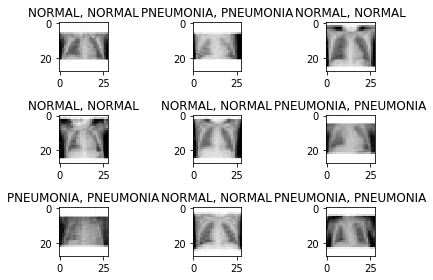

In [93]:
correct = np.where(predicted_classes==test_Y)[0]
print("Encontradas %d predicciones correctas" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(NEUMONIA[predicted_classes[correct]],
                                                    NEUMONIA[test_Y[correct]]))

    plt.tight_layout()

#### Se muestra las precciones incorrectas

Encontradas 55 predicciones incorrectas


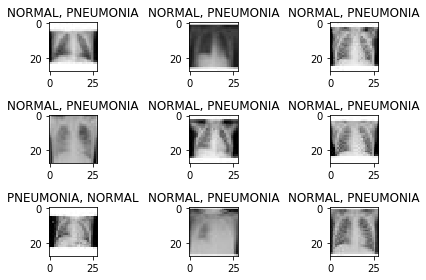

In [94]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Encontradas %d predicciones incorrectas" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(NEUMONIA[predicted_classes[incorrect]],
                                                    NEUMONIA[test_Y[incorrect]]))
    plt.tight_layout()

In [95]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.94      0.91       284
     Class 1       0.95      0.90      0.93       378

    accuracy                           0.92       662
   macro avg       0.91      0.92      0.92       662
weighted avg       0.92      0.92      0.92       662

